<a href="https://colab.research.google.com/github/a-n-u-r-a-g/Hybrid-Ensemble-Learning/blob/main/CICIDS_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten, Reshape
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install shap
!pip install lime
import shap
import lime.lime_tabular

In [ ]:
df = pd.read_csv('/content/dataset.csv')

# Print the columns of the dataframe
print("Columns in the dataset:", df.columns)

# Print the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

Columns in the dataset: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Pa

In [ ]:
# Rename 'Label' column to 'target' and encode it
df.rename(columns={' Label': 'target'}, inplace=True)
df['target'] = df['target'].map(lambda x: 1 if x != 'BENIGN' else 0)

# Identify categorical columns (if any) and apply one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'target']  # Exclude 'target'
df = pd.get_dummies(df, columns=categorical_cols)

# Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Split the dataset BEFORE handling infinite values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle infinite and missing values in BOTH training and testing sets
X_train = X_train.replace([np.inf, -np.inf], np.nan) # Replace infinite values with NaN
X_train = X_train.fillna(X_train.mean()) # Fill NaN values with the mean of each column

X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_test = X_test.fillna(X_test.mean())

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Further split the training dataset to create X_train_part and y_train_part
X_train_part, _, y_train_part, _ = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)


NameError: name 'df' is not defined

In [ ]:
# Define CNN Model
cnn_model = Sequential([
    Reshape((X_train_part.shape[1], 1), input_shape=(X_train_part.shape[1],)),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN Model
cnn_model.fit(X_train_part, y_train_part, epochs=10, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 96s 6ms/step - accuracy: 0.9788 - loss: 0.0526 - val_accuracy: 0.9909 - val_loss: 0.0229
Epoch 2/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 133s 5ms/step - accuracy: 0.9906 - loss: 0.0221 - val_accuracy: 0.9939 - val_loss: 0.0177
Epoch 3/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 140s 5ms/step - accuracy: 0.9920 - loss: 0.0188 - val_accuracy: 0.9932 - val_loss: 0.0164
Epoch 4/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 144s 5ms/step - accuracy: 0.9934 - loss: 0.0163 - val_accuracy: 0.9949 - val_loss: 0.0137
Epoch 5/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - accuracy: 0.9950 - loss: 0.0131 - val_accuracy: 0.9962 - val_loss: 0.0105
Epoch 6/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step - accuracy: 0.9958 - loss: 0.0118 - val_accuracy: 0.9973 - val_loss: 0.0089
Epoch 7/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 147s 5ms/step - accuracy: 0.9961 - loss: 0.0104 - val_accuracy: 0.9972 - val_loss: 0.0088
Epoch 8/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 136s 5ms/step - accur

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten, Reshape, Bidirectional
# Define BiLSTM Model
bilstm_model = Sequential([
    Reshape((X_train_part.shape[1], 1), input_shape=(X_train_part.shape[1],)),
    Bidirectional(LSTM(50)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the BiLSTM Model
bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train BiLSTM Model
bilstm_model.fit(X_train_part, y_train_part, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 936s 56ms/step - accuracy: 0.9514 - loss: 0.1134 - val_accuracy: 0.9794 - val_loss: 0.0378
Epoch 2/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 995s 57ms/step - accuracy: 0.9851 - loss: 0.0345 - val_accuracy: 0.9895 - val_loss: 0.0293
Epoch 3/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 993s 57ms/step - accuracy: 0.9869 - loss: 0.0296 - val_accuracy: 0.9922 - val_loss: 0.0227
Epoch 4/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 990s 58ms/step - accuracy: 0.9903 - loss: 0.0232 - val_accuracy: 0.9937 - val_loss: 0.0189
Epoch 5/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 946s 56ms/step - accuracy: 0.9927 - loss: 0.0188 - val_accuracy: 0.9943 - val_loss: 0.0154
Epoch 6/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 982s 56ms/step - accuracy: 0.9935 - loss: 0.0168 - val_accuracy: 0.9934 - val_loss: 0.0176
Epoch 7/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 983s 56ms/step - accuracy: 0.9941 - loss: 0.0151 - val_accuracy: 0.9955 - val_loss: 0.0149
Epoch 8/10
16681/16681 ━━━━━━━━━━━━━━━━━━━━ 942s 56ms/s

In [ ]:
# Define Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_part, y_train_part)


RandomForestClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:18:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


6516/6516 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
6516/6516 ━━━━━━━━━━━━━━━━━━━━ 99s 15ms/step
Ensemble Model Accuracy: 99.98%
Ensemble Model Precision: 99.97%
Ensemble Model Recall: 99.98%
Ensemble Model F1 Score: 99.98%
Ensemble Model False Positive Rate (FPR): 0.02%
Confusion Matrix:
 [[125849     21]
 [    14  82628]]


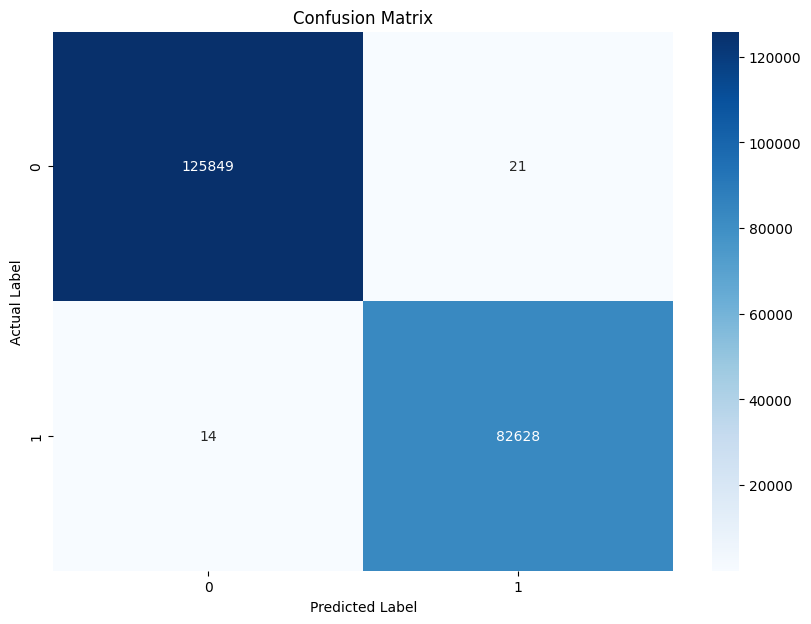

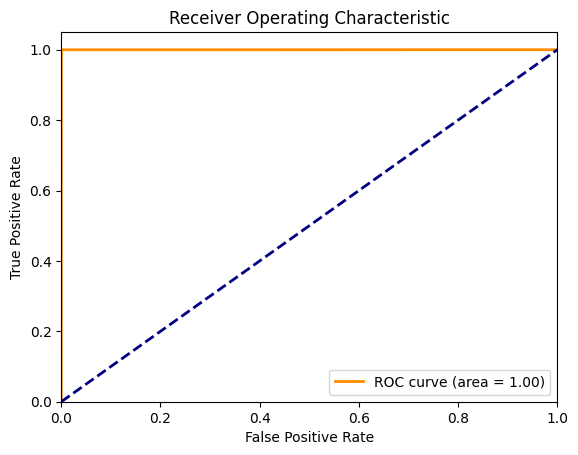

In [ ]:
# Define individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train Random Forest, Gradient Boosting, and XGBoost Models
rf_model.fit(X_train_part, y_train_part)
gb_model.fit(X_train_part, y_train_part)
xgb_model.fit(X_train_part, y_train_part)

# Get predictions from CNN and BiLSTM models
y_pred_cnn = (cnn_model.predict(X_test_scaled) > 0.5).astype("int32")
y_pred_bilstm = (bilstm_model.predict(X_test_scaled) > 0.5).astype("int32")

# Combine predictions for stacking
stacked_predictions = np.column_stack((
    rf_model.predict(X_test_scaled),
    gb_model.predict(X_test_scaled),
    xgb_model.predict(X_test_scaled),
    y_pred_cnn.flatten(),
    y_pred_bilstm.flatten()
))

# Define and train meta-model
meta_model = LogisticRegression(random_state=42)
meta_model.fit(stacked_predictions, y_test)

# Meta-model predictions
y_pred_meta = meta_model.predict(stacked_predictions)

# Evaluate the performance of the ensemble model
accuracy = accuracy_score(y_test, y_pred_meta)
precision = precision_score(y_test, y_pred_meta)
recall = recall_score(y_test, y_pred_meta)
f1 = f1_score(y_test, y_pred_meta)
cm = confusion_matrix(y_test, y_pred_meta)

# Calculate FPR, TPR for ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_meta)

# Calculate False Positive Rate (FPR)
tn, fp, fn, tp = cm.ravel()
fpr_value = fp / (fp + tn)

# Print the evaluation metrics
print("Ensemble Model Accuracy: {:.2f}%".format(accuracy * 100))
print("Ensemble Model Precision: {:.2f}%".format(precision * 100))
print("Ensemble Model Recall: {:.2f}%".format(recall * 100))
print("Ensemble Model F1 Score: {:.2f}%".format(f1 * 100))
print("Ensemble Model False Positive Rate (FPR): {:.2f}%".format(fpr_value * 100))
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Plot ROC curve for the ensemble model
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Create a SHAP explainer for the meta-model
explainer = shap.Explainer(meta_model, stacked_predictions)

# Calculate SHAP values for the test set
shap_values = explainer(stacked_predictions)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, stacked_predictions, feature_names=[
    'RF Prediction', 'GB Prediction', 'XGB Prediction', 'CNN Prediction', 'BiLSTM Prediction'
])

# Plot SHAP dependence plot for a specific feature
shap.dependence_plot(0, shap_values.values, stacked_predictions)  # 0 refers to the first feature (RF Prediction)


NameError: name 'shap' is not defined

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer for the meta-model
explainer = LimeTabularExplainer(stacked_predictions, feature_names=[
    'RF Prediction', 'GB Prediction', 'XGB Prediction', 'CNN Prediction', 'BiLSTM Prediction'
], class_names=['Class 0', 'Class 1'], verbose=True, mode='classification')

# Explain a specific prediction (e.g., the first instance in the test set)
exp = explainer.explain_instance(stacked_predictions[0], meta_model.predict_proba, num_features=5)

# Display the explanation
exp.show_in_notebook(show_table=True)
exp.as_pyplot_figure()
